In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
wt_promoter = "TTTACACTTTATGCTTCCGGCTCGTATGTT"

In [3]:
# load in Brewster energy matrix
matrix = pd.read_csv("../../data/brewster_matrixS2.txt", header=None, sep = "\s+", comment="#")
matrix.columns = ["A","C","G","T"]
matrix = matrix[5:-6].reset_index(drop=True)
matrix.head()

,A,C,G,T
0,0.305961,0.681616,0.360140,-0.313427
1,0.122283,0.247441,0.171605,-0.313427
2,1.500683,1.490967,-0.313427,0.633869
3,-0.313427,1.032246,-0.138758,0.699062
4,1.064641,-0.214039,1.119622,-0.313427


In [4]:
# define the binding energy function
def binding_energy(seq, matrix):
    """
    Inputs:
        seq: string, 30 bp sequence 
        matrix: pandas dataframe, binding energy matrix
    Outputs:
        binding energy: float"""
    
    # make sure the sequence is capitilized
    seq = seq.upper()
    
    # initilize running tally
    tally_energy = 0
    
    # iterate through the basepairs of the sequence
    for i, bp in enumerate(seq):
        
        # determine energy of given bp and add to tally
        bp_e = matrix.at[i,bp]
        tally_energy = tally_energy + bp_e
        
    return tally_energy

In [5]:
wt_energy = binding_energy(wt_promoter, matrix)
wt_energy

-3.2440813500089694

In [17]:
def all_SNPs_binding_energy(sequences, matrix):
    """ Calculates the binding energy of all possible sequences resulting from a single point mutations
    about the sequence(s) provided.
    This can allow for subsequent use of the function to get all single mutants, double mutants, etc.
    """
    
    # initialize a names, sequence, and energies list
    seqs = []
    energies = []
    
    for sequence in sequences:
        
        sequence = sequence.upper()
    
        for i, bp in enumerate(sequence):

            # possible bases:
            bases = ['A', 'T', 'C', 'G']

            # remove the base pair which is already in the sequence from the bases list
            bases.remove(bp)

            # make each possible mutation and store it in a list
            for base in bases:

                # determine the new sequence, calculate its energy, and store it
                seq = sequence[:i] + base + sequence[i+1:]
                energy = binding_energy(seq, matrix)
                seqs += [seq]
                energies += [energy]

            
    # return a data frame
    df = pd.DataFrame(columns=["sequence", "energy"])
    df["sequence"] = seqs
    df["energy"] = energies
    return df

## Single mutants 

In [19]:
single_muts = all_SNPs_binding_energy([wt_promoter], matrix)
single_muts.tail()

,sequence,energy
85,TTTACACTTTATGCTTCCGGCTCGTATGCT,-3.774452
86,TTTACACTTTATGCTTCCGGCTCGTATGGT,-3.289536
87,TTTACACTTTATGCTTCCGGCTCGTATGTA,-2.254904
88,TTTACACTTTATGCTTCCGGCTCGTATGTC,-1.716471
89,TTTACACTTTATGCTTCCGGCTCGTATGTG,-1.937952


In [23]:
def ECDF(x_vals):
    
    plt.plot(sorted(x_vals), np.linspace(0,1,len(x_vals)), '.')
    plt.axvline(x=binding_energy(wt_promoter, matrix), color='r')
    plt.legend(["mutants", "wt promoter"])
    plt.xlabel("binding energy")
    plt.ylabel("ECDF")

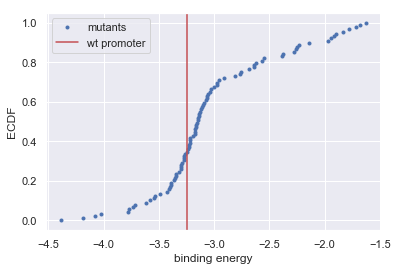

In [24]:
ECDF(single_muts["energy"])

## Double mutants

In [27]:
double_muts = all_SNPs_binding_energy(single_muts["sequence"], matrix)
double_muts.tail()

,sequence,energy
8095,TTTACACTTTATGCTTCCGGCTCGTATGCG,-2.468323
8096,TTTACACTTTATGCTTCCGGCTCGTATGGG,-1.983407
8097,TTTACACTTTATGCTTCCGGCTCGTATGTA,-2.254904
8098,TTTACACTTTATGCTTCCGGCTCGTATGTT,-3.244081
8099,TTTACACTTTATGCTTCCGGCTCGTATGTC,-1.716471


In [28]:
double_muts.drop_duplicates(inplace=True)
double_muts.tail()

,sequence,energy
7828,TTTACACTTTATGCTTCCGGCTCGTATGGC,-1.761926
7829,TTTACACTTTATGCTTCCGGCTCGTATGGG,-1.983407
7918,TTTACACTTTATGCTTCCGGCTCGTATGTC,-1.716471
7919,TTTACACTTTATGCTTCCGGCTCGTATGTG,-1.937952
8007,TTTACACTTTATGCTTCCGGCTCGTATGTA,-2.254904


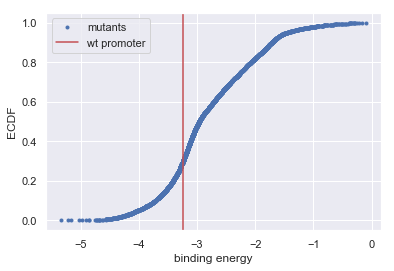

In [30]:
ECDF(double_muts["energy"])

## Triple mutants

In [31]:
triple_muts = all_SNPs_binding_energy(double_muts["sequence"], matrix)
triple_muts.tail()

,sequence,energy
360535,TTTACACTTTATGCTTCCGGCTCGTATGCA,-2.785274
360536,TTTACACTTTATGCTTCCGGCTCGTATGGA,-2.300359
360537,TTTACACTTTATGCTTCCGGCTCGTATGTT,-3.244081
360538,TTTACACTTTATGCTTCCGGCTCGTATGTC,-1.716471
360539,TTTACACTTTATGCTTCCGGCTCGTATGTG,-1.937952


In [33]:
triple_muts.drop_duplicates(inplace=True)
triple_muts.tail()

,sequence,energy
359368,TTTACACTTTATGCTTCCGGCTCGTATGGC,-1.761926
359369,TTTACACTTTATGCTTCCGGCTCGTATGGG,-1.983407
359458,TTTACACTTTATGCTTCCGGCTCGTATGAC,-2.548118
359459,TTTACACTTTATGCTTCCGGCTCGTATGAG,-2.769600
359547,TTTACACTTTATGCTTCCGGCTCGTATGAA,-3.086551


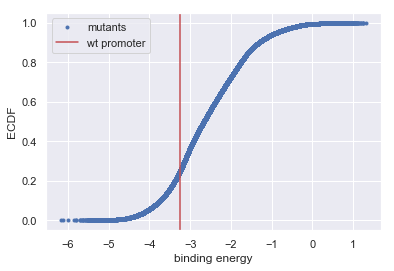

In [35]:
ECDF(triple_muts["energy"])